### Importing the necessary libraries

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA

### Loading the datasets

In [2]:
customers = pd.read_csv('Customers_Preprocessed.csv')
transactions = pd.read_csv('Transactions_Preprocessed.csv')

### Aggregating transaction information for each customer

In [3]:
transaction_summary = transactions.groupby('CustomerID').agg({
    'Quantity': 'sum',
    'TotalValue': 'sum',
    'TransactionID': 'count'
}).reset_index()

transaction_summary

,CustomerID,Quantity,TotalValue,TransactionID
0,C0001,12,3354.52,5
1,C0002,10,1862.74,4
2,C0003,14,2725.38,4
3,C0004,23,5354.88,8
4,C0005,7,2034.24,3
...,...,...,...,...
194,C0196,12,4982.88,4
195,C0197,9,1928.65,3
196,C0198,3,931.83,2
197,C0199,9,1979.28,4


In [4]:
customer_data = pd.merge(customers, transaction_summary, on='CustomerID', how='inner')
customer_data

,CustomerID,CustomerName,Region,SignupDate,SignupYear,SignupMonth,Quantity,TotalValue,TransactionID
0,C0001,Lawrence Carroll,South America,2022-07-10,2022,2022-07,12,3354.52,5
1,C0002,Elizabeth Lutz,Asia,2022-02-13,2022,2022-02,10,1862.74,4
2,C0003,Michael Rivera,South America,2024-03-07,2024,2024-03,14,2725.38,4
3,C0004,Kathleen Rodriguez,South America,2022-10-09,2022,2022-10,23,5354.88,8
4,C0005,Laura Weber,Asia,2022-08-15,2022,2022-08,7,2034.24,3
...,...,...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,2022,2022-06,12,4982.88,4
195,C0197,Christina Harvey,Europe,2023-03-21,2023,2023-03,9,1928.65,3
196,C0198,Rebecca Ray,Europe,2022-02-27,2022,2022-02,3,931.83,2
197,C0199,Andrea Jenkins,Europe,2022-12-03,2022,2022-12,9,1979.28,4


### Encoding Categorical Values

In [5]:
customer_data_encoded = pd.get_dummies(customer_data[['Region']], drop_first=True)
customer_data_encoded

,Region_Europe,Region_North America,Region_South America
0,False,False,True
1,False,False,False
2,False,False,True
3,False,False,True
4,False,False,False
...,...,...,...
194,True,False,False
195,True,False,False
196,True,False,False
197,True,False,False


In [6]:
features = pd.concat([
    customer_data_encoded, 
    customer_data[['Quantity', 'TotalValue', 'TransactionID']]
], axis=1)
features

,Region_Europe,Region_North America,Region_South America,Quantity,TotalValue,TransactionID
0,False,False,True,12,3354.52,5
1,False,False,False,10,1862.74,4
2,False,False,True,14,2725.38,4
3,False,False,True,23,5354.88,8
4,False,False,False,7,2034.24,3
...,...,...,...,...,...,...
194,True,False,False,12,4982.88,4
195,True,False,False,9,1928.65,3
196,True,False,False,3,931.83,2
197,True,False,False,9,1979.28,4


In [7]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

### Elbow Method

c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

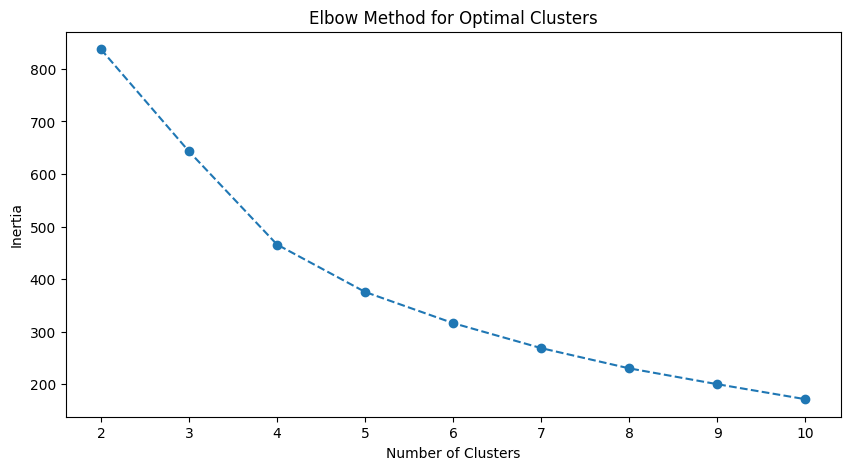

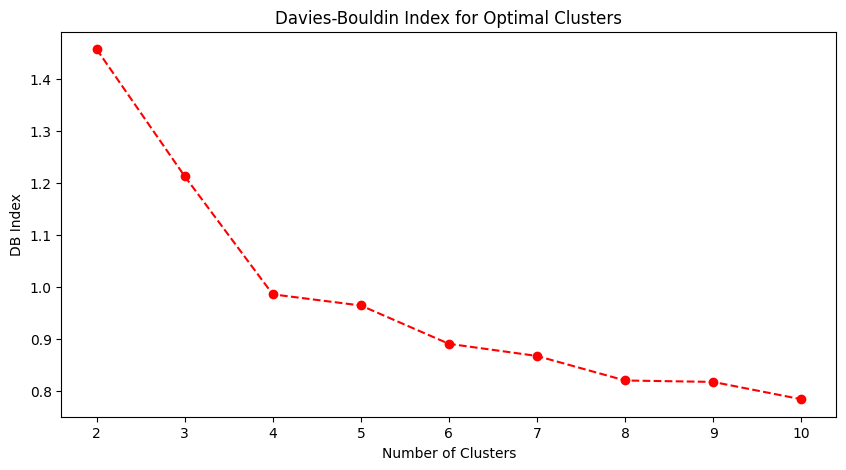

In [12]:
inertia = []
db_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)
    db_scores.append(davies_bouldin_score(features_scaled, kmeans.labels_))

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), db_scores, marker='o', linestyle='--', color='red')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.show()

In [9]:
optimal_clusters = db_scores.index(min(db_scores)) + 2
optimal_clusters

10

### K-Means Clustering

In [10]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(features_scaled)

c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
db_index = davies_bouldin_score(features_scaled, customer_data['Cluster'])
silhouette_avg = silhouette_score(features_scaled, customer_data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 0.7848748526738408
Silhouette Score: 0.4421262539240562


### Visualising Clusters with PCA

c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\saatv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

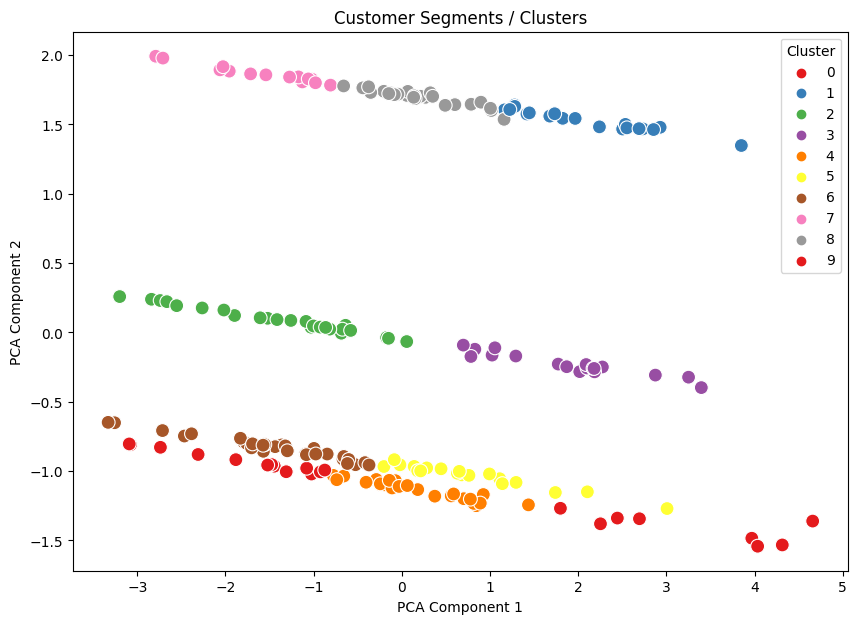

In [16]:
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features_scaled)

plt.figure(figsize=(10, 7))
sns.scatterplot(x=features_2d[:, 0], y=features_2d[:, 1], hue=customer_data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments / Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()